# İzlediğim filmlerin veri analizi

2011 yılında üye olduğum IMDb'de izlediğim filmleri eklediğim ve oyladığım bir [listem](https://www.imdb.com/list/ls003368018/) var. Listedeki verilerin bana neler söylediğine kısaca bakmak istedim. Pandas ile yüklediğim .csv dosyasını Seaborn ile görselleştirdim.

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('films.csv', encoding = "ISO-8859-1", parse_dates=['Date Rated'])

Önce verinin bir özetini inceleyelim, bakalım neler var.

In [2]:
df.head()

,Position,Const,Created,Modified,Description,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Your Rating,Date Rated
0,1,tt1255953,2011-10-05,2011-10-05,NaN,Incendies,https://www.imdb.com/title/tt1255953/,movie,8.3,131.0,2010,"Drama, Mystery, War",148795.0,2010-09-03,Denis Villeneuve,9,2011-10-05
1,2,tt0111161,2011-10-05,2011-10-05,NaN,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,movie,9.3,142.0,1994,Drama,2331655.0,1994-09-10,Frank Darabont,9,2011-11-01
2,3,tt0068646,2011-10-05,2011-10-05,NaN,The Godfather,https://www.imdb.com/title/tt0068646/,movie,9.2,175.0,1972,"Crime, Drama",1611776.0,1972-03-14,Francis Ford Coppola,9,2011-11-01
3,4,tt0071562,2011-10-05,2011-10-05,NaN,The Godfather: Part II,https://www.imdb.com/title/tt0071562/,movie,9.0,202.0,1974,"Crime, Drama",1124894.0,1974-12-12,Francis Ford Coppola,7,2011-11-01
4,5,tt0108052,2011-10-05,2011-10-05,NaN,Schindler's List,https://www.imdb.com/title/tt0108052/,movie,8.9,195.0,1993,"Biography, Drama, History",1208546.0,1993-11-30,Steven Spielberg,6,2011-11-01


## Listede kaç film var?

In [3]:
len(df['Title'])

279

Kaç film üzerinden çalışacağımızı öğrendik. Başlamadan grafiklerin boyutuna da sabit değer girelim ki güzel bir görünüm elde edelim.

In [4]:
sns.set(rc={'figure.figsize':(12,10)})

## Oylama yaptığım tarihe ve çıkış yılına göre film puanları

<AxesSubplot:xlabel='Date Rated', ylabel='IMDb Rating'>

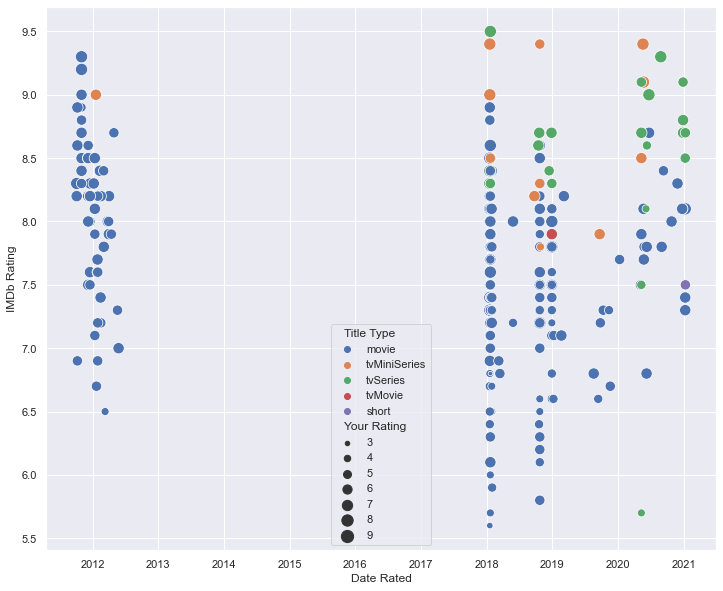

In [5]:
sns.scatterplot(x = 'Date Rated', y = 'IMDb Rating', data = df, color = "navy", hue="Title Type",
               size='Your Rating', sizes=(20,150))

IMDb'de üyelik oluşturduğum yıl 2011 ama 2012'den sonra tam 5 yıl listeme film eklememişim. Grafiğin zaman aralığı filmleri benim oyladığım tarihlerden oluşuyor. 2018'den sonra kullandığım liste bana arada izleyip de listeye eklemediğim veya puanların da olabileceğini söylüyor. Listeyi ne zamandan veri güncel tuttuğum adına iyi bilgi bu. Yukarıdaki değerler IMDb puanlarıydı, benim puanlarım ne durumda?

<AxesSubplot:xlabel='Date Rated', ylabel='Your Rating'>

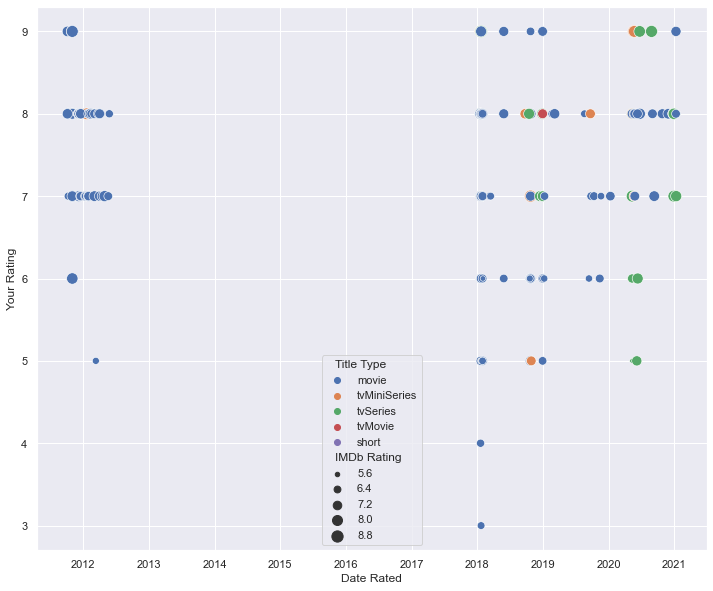

In [6]:
sns.scatterplot(x = 'Date Rated', y = 'Your Rating', data = df, color = "navy", hue="Title Type",
               size='IMDb Rating', sizes=(20,150))

IMDb puanlarındaki genel ortalama 7'ye yaklaşsa da yukarıdaki puanlarımdan çıkardığım sonuç izlediğim filmleri genelde beğeniyor olmam. 7'nin altında not verdiğim filmler oldukça azınlıkta. Kendimden biliyorum, bir filmi izleme listeme atmak için oldukça seçici davranıyorum. Spoiler olmadan yorumuna güvendiğim kişilerin ne söylediğine göz atıyor, yönetmen ve senaristin kim olduğuna bakıyor, beni tanıyanların bana tavsiye ettiklerini inceliyor ve filmi izledikten sonra da bulabildiğim iyi inceleme ve yorumları okuyorum. Teknik bilgilerine bakmayıp da gözüm kapalı izlediğim bir filmi hiç hatırlamıyorum. Oylarımın çok nadir 7'nin altına düştüğü bundan dolayı olabilir.

Yayınlandığı yıla göre filmlerin IMDb ve benim puanlarıma da bakalım.

<AxesSubplot:xlabel='Year', ylabel='IMDb Rating'>

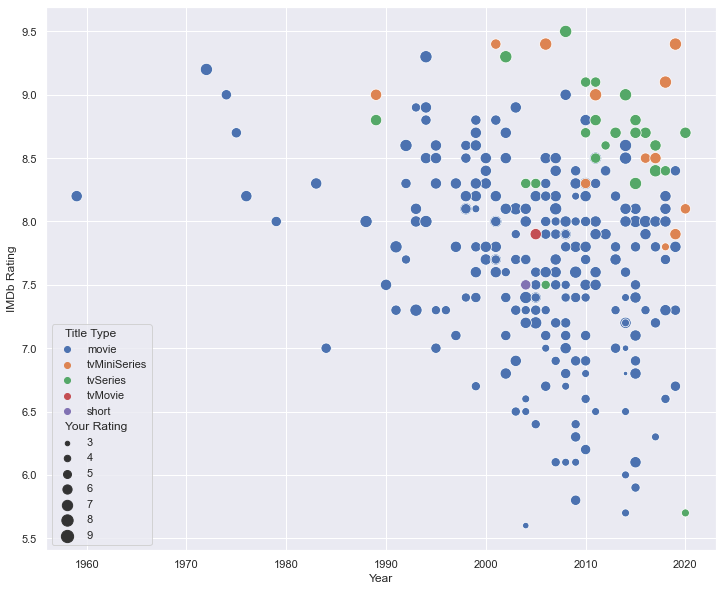

In [7]:
sns.scatterplot(x = 'Year', y = 'IMDb Rating', data = df, color = "navy", hue="Title Type",
               size='Your Rating', sizes=(20,150))

2000 sonrası çıkan filmler listemde çoğunlukta. Eskilerden izlediğim filmler çok nadir. IMDb puanları olarak da dağınık bir görüntü var. Yalnız burada dikkat çeken şey dizilerin yüksek puanlı olması. Diziler doğaları gereği IMDb'de zaten yüksek puanlı ama burada benim de bilinçli bir tercihim var. Tavsiye üzerine başlamış da olabiliyorum dizilerde ama en iyi oyları almış dizilere öncelik veriyorum.

<AxesSubplot:xlabel='Year', ylabel='Your Rating'>

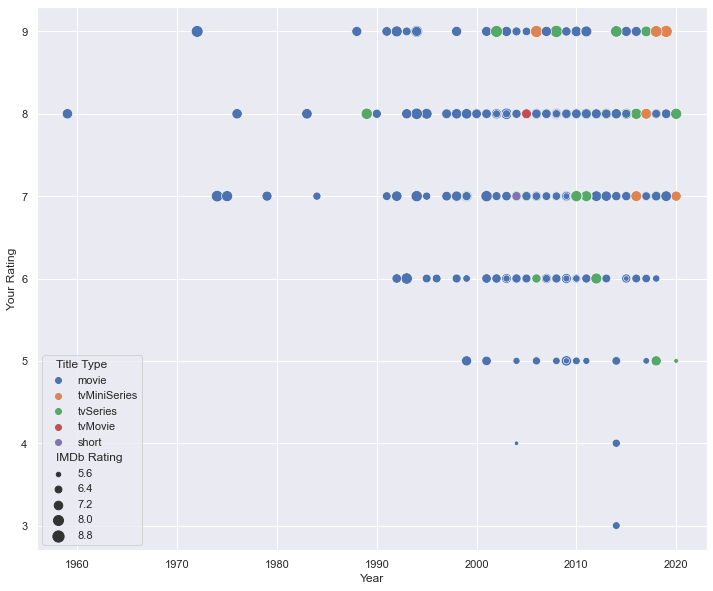

In [8]:
sns.scatterplot(x = 'Year', y = 'Your Rating', data = df, color = "navy", hue="Title Type",
               size='IMDb Rating', sizes=(20,150))

Önceki grafikle yukarıdakinde bariz olarak görünen şey puanlamada bonkör davranmış olmam. IMDb puanlarındaki dağınıklık burada yüksek puanlara doğru kaymış gözüküyor. Öyle ki 9 ile puanlamada elimi korkak alıştırmamışım. İnsanların sevmeyip de benim çok sevdiğim filmlerin olduğu anlaşılıyor. Burada şunu merak ediyorum: Acaba IMDb puanlarıyla benim puanlarım arasında anlamlı bir ilişki var mı? Yani insanların genel olarak sevdiği şeyleri ben de seviyor muyum? Bunun için [korelasyona](https://tr.wikipedia.org/wiki/Korelasyon) ihtiyacımız var.

In [9]:
corr = df['IMDb Rating'].corr(df['Your Rating'])

corr

0.5465327518393773

Evet varmış. **0.54**, IMDb puanlarıyla benimkiler arasında pozitif bir ilişki olduğunu söylüyor. Çok anlamlı mı? Sayılır, orta derecenin biraz üzerinde, yükseğe yakın. Yani IMDb puanları yüksekse benim de yüksek puan verme ihtimalim yüksek. Başka hangi değerler arasında ilişki var onlara da bakalım.

<AxesSubplot:>

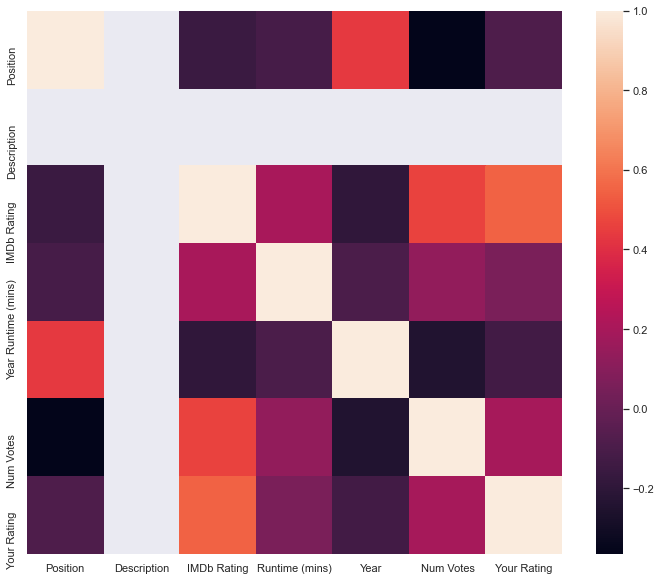

In [10]:
corr = df.corr(method='pearson')

sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)

IMDb puanlarıyla benim puanım arasındaki ilişkiyi buradan da görebiliyoruz. En açık turuncu olan kutu, en alt sırada soldan üçüncü. Turuncu olanları incelemeye devam edelim. Kullanılan oy sayısıyla IMDb puanı arasında da iyi sayılabilecek anlamlı bir ilişki var. Yani kullanılan oy sayısı ne kadar fazlaysa IMDb puanları da yükseliyor. Benim oylarımla kullanılan oy sayısı arasında eh işte denibilecek bir ilişki var ama en açık turuncu olan kadar değil. Sonuçta benim oyum ile dağdaki ço...

## En çok ve en az oy alan filmler ve yönetmenler

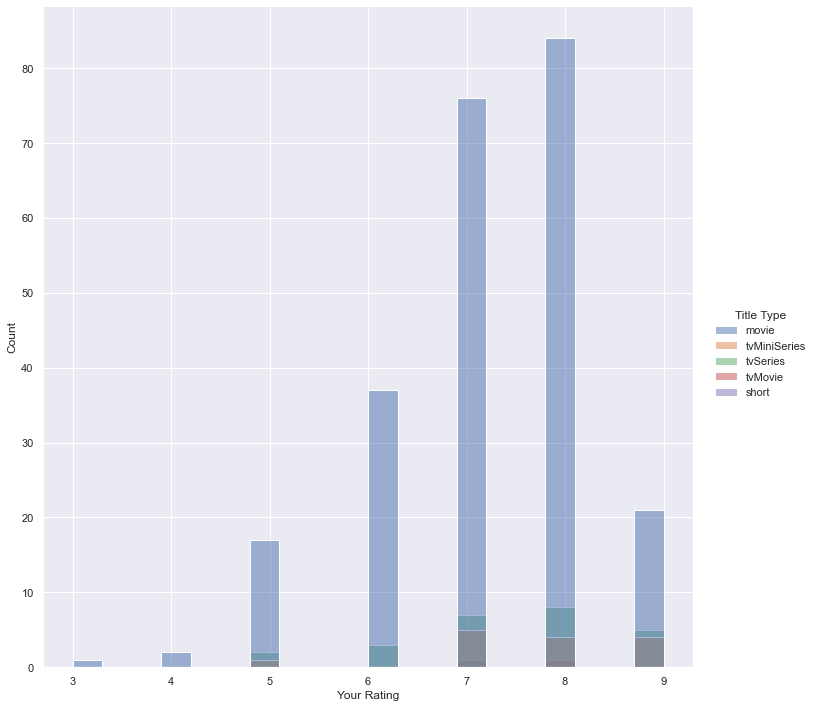

In [11]:
sns.displot(x = 'Your Rating', height=10, hue='Title Type', data = df)

En çok kullandığım oylar buradan da görüldüğü üzere 7 ve 8. Muhtemelen 7'den düşük olanlardaki duygu durumum yuh bu ne rezalet ya olabilir. 9 konusunda ise seçici olduğumu düşünüyorum. 9 zirve gibi sanki ama 10 da var, hiç bir filme 10 vermemem de çok ilginç bu arada. Çok sevdiğim döne döne izlediğim filmler var halbuki. Bakalım 9'luk filmler neler.

<AxesSubplot:xlabel='IMDb Rating', ylabel='Title'>

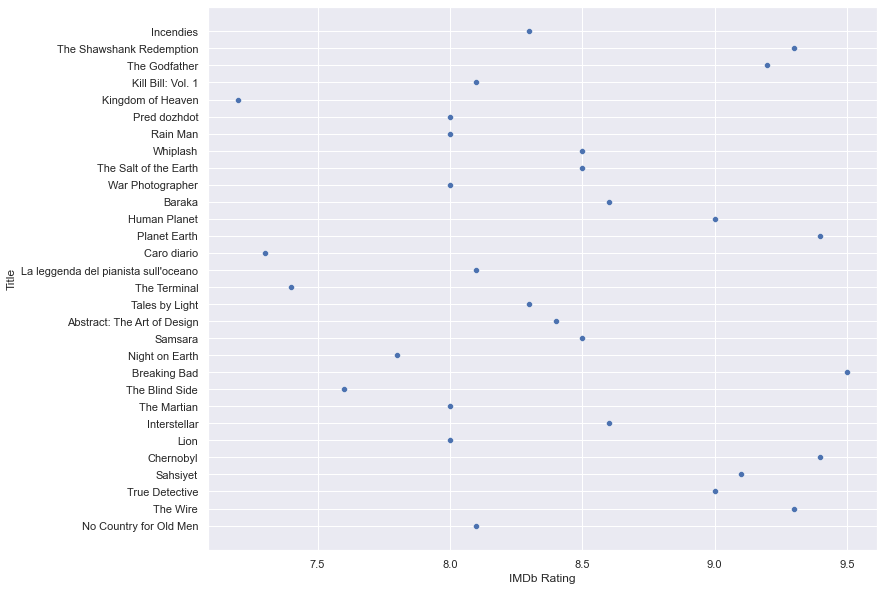

In [12]:
sns.scatterplot(x = 'IMDb Rating', y= 'Title', data = df.loc[df['Your Rating'] >= 9])

Yukarıda benim 9 puan verdiğim filmlerin IMDb puanlarını görüyorsunuz. [Caro Diario](https://www.imdb.com/title/tt0109382/) gibi bir başyapıta insanların neden 7 buçuğun altında benim 9 puan vermemi birkaç arkadaşım anlar. Bak yine canım istedi. Listeye tekrar bakıyorum, valla iyi filmler.

<AxesSubplot:xlabel='IMDb Rating', ylabel='Title'>

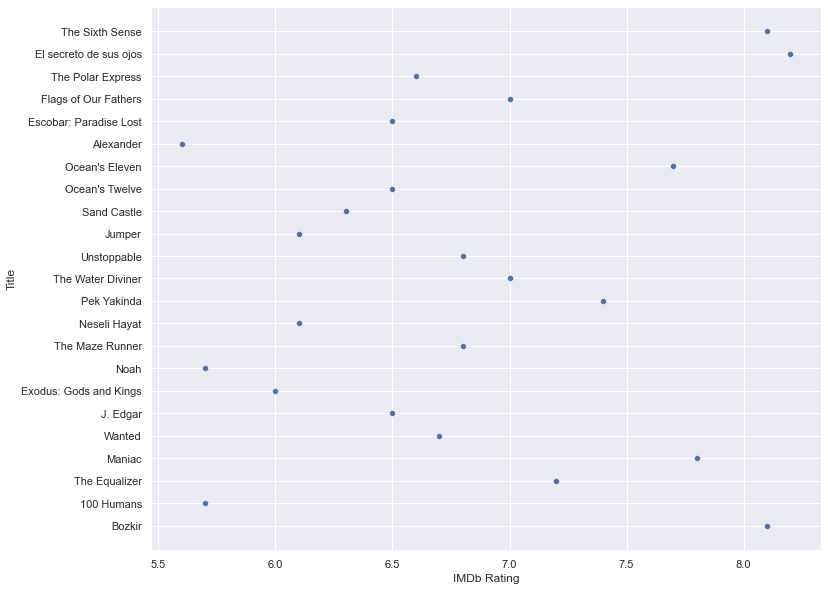

In [13]:
sns.scatterplot(x = 'IMDb Rating', y= 'Title', data = df.loc[df['Your Rating'] <= 5])

Yukarıdaki filmler de benim 5 ve altında puan verdiğim filmlerin IMDb puanları. Şaşırdığım birkaç tane var acaba niye öyle az puan vermişim dediğim ama en çok [The Sixth Sense](https://www.imdb.com/title/tt0109382/)'e şaşırdım. Hakkındaki sinema çıkışı geyiklerini bilen bilir, spoiler vermeyelim durduk yere.

<AxesSubplot:xlabel='IMDb Rating', ylabel='Directors'>

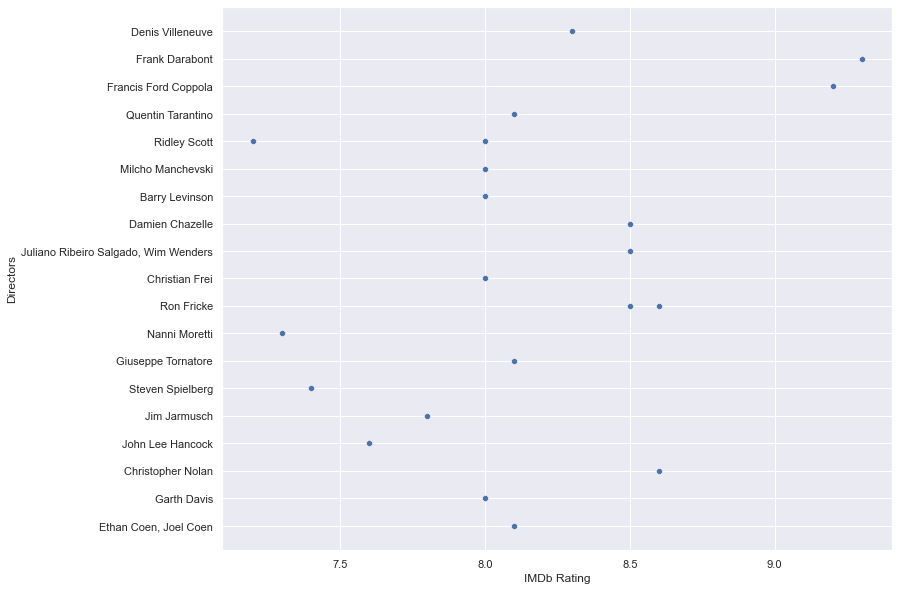

In [14]:
sns.scatterplot(x = 'IMDb Rating', y= 'Directors', data = df.loc[df['Your Rating'] >= 9])

Bunlar da krallar. 9 puan verdiğim filmlerin yönetmenleri. Listeyi görünce **David Fincher** ve **Guy Ritchie**'ye haksızlık ettiğimi düşündüm. Kendilerinden özür dilerim, onların da burada yer alması gerekirdi. Listeyi güncellerim muhtemelen bunu gördükten sonra, ayıp olmuş. 5 puan ve daha aşağıki puanlar için de bir grafik hazırlayıp herkesin önünde onları rencide etmek istemiyorum.

Teşekkürler.